In [1]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns
import string
import numpy as np

In [2]:
data = pd.read_csv("preprocessed_data.csv", sep=',')
data.head()

,Unnamed: 0,job_title,company_name,location,summary,job search,summary_clean,tokens,no_stop,stems,lemmatize
0,0,Data Analyst - YouTube,Webhelp Americas,"San Bruno, CAâ€¢Temporarily Remote",Strong grasp on data structure and data integr...,data analyst,Strong grasp on data structure and data integr...,"['strong', 'grasp', 'on', 'data', 'structure',...","['strong', 'grasp', 'data', 'structure', 'data...","['strong', 'grasp', 'data', 'structur', 'data'...","['strong', 'grasp', 'data', 'structure', 'data..."
1,1,Marketing Data Analyst (REMOTE),Molina Healthcare,"Long Beach, CA 90802â€¢Remote",Designs and implements processes and solutions...,data analyst,Designs and implements processes and solutions...,"['designs', 'and', 'implements', 'processes', ...","['designs', 'implements', 'processes', 'soluti...","['design', 'implement', 'process', 'solut', 'a...","['design', 'implement', 'process', 'solution',..."
2,2,Entry Level Data Analyst,Insight Global,"Carlsbad, CA 92008",They will be responsible for data administrati...,data analyst,They will be responsible for data administrati...,"['they', 'will', 'be', 'responsible', 'for', '...","['responsible', 'data', 'administration', 'tas...","['respons', 'data', 'administr', 'task', 'pull...","['responsible', 'data', 'administration', 'tas..."
3,3,Entry Level - Data Engineer / Data Analyst (STEM),PCS Global Tech,"Poway, CAâ€¢Temporarily Remote","Provides plan with data, reporting, and analys...",data analyst,Provides plan with data reporting and analyses...,"['provides', 'plan', 'with', 'data', 'reportin...","['provides', 'plan', 'data', 'reporting', 'ana...","['provid', 'plan', 'data', 'report', 'analys',...","['provides', 'plan', 'data', 'reporting', 'ana..."
4,4,Data Analyst/Data Engineer,MT Global US INC,"Foster City, CA 94404","\* Owner of the core company data pipeline, re...",data analyst,Owner of the core company data pipeline respo...,"['', 'owner', 'of', 'the', 'core', 'company', ...","['', 'owner', 'core', 'company', 'data', 'pipe...","['', 'owner', 'core', 'compani', 'data', 'pipe...","['', 'owner', 'core', 'company', 'data', 'pipe..."


In [3]:
stopword = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer() 

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [4]:
X=data['summary']
y=data['job search']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [5]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train)

tfidf_train = tfidf_vect_fit.transform(X_train)
tfidf_test = tfidf_vect_fit.transform(X_test)
X_train_vect = pd.DataFrame(tfidf_train.toarray())
X_test_vect = pd.DataFrame(tfidf_test.toarray())

X_train_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,2724,2725,2726,2727,2728,2729,2730,2731,2732,2733
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.079158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.084541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.067226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.073418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Precision: [False False False] / Recall: [False False False] / F1-Score: [False False False] / Accuracy: False


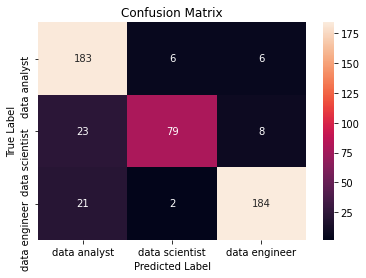

In [6]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train_vect, y_train)

y_pred = rf_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred)
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    np.isclose(precision, 3), np.isclose(recall, 3), np.isclose(fscore, 3), np.isclose(acs(y_test,y_pred), 3)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = ["data analyst", "data scientist", "data engineer"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("classifer_matrix.png")
plt.show()